### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Independent variable is what is not affected or changed by the other factors.

In this dataset: the number of participants

Dependent variable is what is affected of changed by the other factors.

In this dataset: the time taken to answer the color of the ink.


(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

In this task the null hypothesis($H_0$) and the alternative hypothesis($H_1$) are as below:

$H_0$:The time taken for the incongruent words is equal to or shorter than the time for congruent words.($T_i$ <= $T_c$)

$H_1$:The time taken for the icongruent words is longer than congruent words.($T_i$ > $T_c$)

To justify these hyposesis, I use the hypothesis test.


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


the mean time for Congruent and Incongruent as below (Incngruent one is larger).

$\mu_c$: 14.05

$\mu_i$: 22.02

the both std is as below (Incngruent one is larger).

$u_c$: 3.56

$u_i$: 4.89




(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [4]:
cong = df['Congruent']
incong = df['Incongruent']

In [24]:
# Compute the observed difference in meantime
obs_diff = incong.mean() - cong.mean()

# Display observed difference
obs_diff

7.9647916666666667

In [5]:
cong_means=[]
incong_means=[]
means_diff=[]
for _ in range(10000):
    bootsample_cong=cong.sample(5,replace=True)
    bootsample_incong = incong.sample(5,replace=True)
    cong_means.append(bootsample_cong.values.mean())
    incong_means.append(bootsample_incong.values.mean())
    means_diff.append(bootsample_incong.values.mean()-bootsample_cong.values.mean())

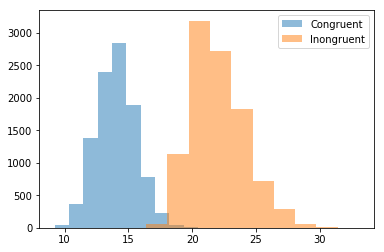

In [23]:
plt.hist(cong_means,alpha=0.5,label='Congruent');
plt.hist(incong_means,alpha=0.5,label='Inongruent');
plt.legend();

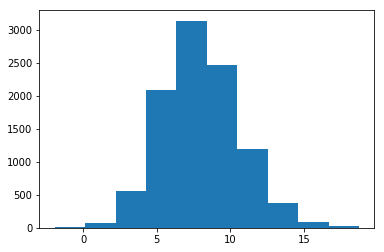

In [7]:
plt.hist(means_diff);

The distributions between 'Congruent' and 'Incongruent' shows that the measurement time for the incongruent colors is longer than congruent colors.
The difference between them is mostly always greather than zero.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [10]:
diff_df=np.array(means_diff)

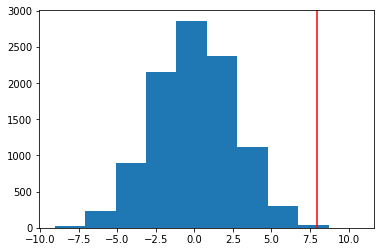

In [25]:
null_vals = np.random.normal(0,diff_df.std(),diff_df.size)

plt.hist(null_vals);
plt.axvline(x=obs_diff, color='red');

In [16]:
# Compute p-value
(null_vals > obs_diff).mean()

0.00069999999999999999

I set the confidence level for 95%, then the p_value <0.05 shows that there is significant difference between test for congruent colors and incongruent colors.
In conclusion, the null hypothesis should be rejected and the alternative hypothesis is supported.

 <h1>Conclusion:</h1>The time taken for the icongruent words is longer than congruent words.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

I think what is responsible for the effects was something related to the brain recognition.
The recognition speed for the congruence and incongruence are different( later one is longer)

I set the other null alternative hypothesis as below

$H_0$: The recognition speed for incongruency is equal to or shorter than that for congruency.

$H_1$: The recognition speed for congruency is firster than that for incongruency.

